In [61]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


代码仓库地址：https://github.com/Lunatic12138/Dataming/blob/main/homework2-AnonymousMicrosoftWebData.ipynb


In [62]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/anonymous-msweb (1).info
/kaggle/input/anonymous-msweb (1).data
/kaggle/input/anonymous-msweb.test
/kaggle/input/anonymous-msweb.info
/kaggle/input/anonymous-msweb.data
/kaggle/input/anonymous-msweb (1).test


处理原始数据，集成web信息表与浏览记录表

In [63]:
web_dict = {}
log_dict = {}
C_id = None
with open ('/kaggle/input/anonymous-msweb.data', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        if line[0] == 'A':
            split_line = line.split(',')
            web_id = split_line[1]
            web_tittle = split_line[3]
            web_url = split_line[4]
            if web_id not in web_dict:
                web_dict[web_id] = {'tittle': str(web_tittle[1:-2]), 'url': str(web_url[1:-3]), 'count': 0}
        if line[0] == 'C':
            split_line = line.split(',')
            C_id = str(int(split_line[2]))
            log_dict[C_id] = []
        if line[0] == 'V':
            split_line = line.split(',')
            V_id = split_line[1]
            web_dict[V_id]['count'] += 1
            log_dict[C_id].append(V_id)

转化为csv格式

In [64]:
with open('/kaggle/working/WebInfo.csv', 'w') as f:
    f.write('web_id,tittle,url,count\n')
    for web_id in web_dict:
        web_info = web_dict[web_id]
        tittle = web_info['tittle']
        url = web_info['url']
        count = web_info['count']
        info = f'{web_id},{tittle},{url},{count}\n'
        f.write(info)
with open('/kaggle/working/LogInfo.csv', 'w') as f:
    f.write('user_id,web_ids\n')
    for user_id in log_dict:
        webs = log_dict[user_id]
        web_ids = ' '.join(webs)
        info = f'{user_id},{web_ids}\n'
        f.write(info)

浏览记录信息表

In [65]:
with open('/kaggle/working/LogInfo.csv', 'r') as f:
    df_log = pd.read_csv(f)
df_log

,user_id,web_ids
0,10001,1000 1001 1002
1,10002,1001 1003
2,10003,1001 1003 1004
3,10004,1005
4,10005,1006
...,...,...
32706,42707,1008 1030 1009 1058 1004 1018
32707,42708,1008 1027 1123 1038 1026 1041
32708,42709,1001 1003
32709,42710,1035 1001 1018


缺省值处理 发现不存在缺省值

In [66]:
df_log.dropna()
df_log

,user_id,web_ids
0,10001,1000 1001 1002
1,10002,1001 1003
2,10003,1001 1003 1004
3,10004,1005
4,10005,1006
...,...,...
32706,42707,1008 1030 1009 1058 1004 1018
32707,42708,1008 1027 1123 1038 1026 1041
32708,42709,1001 1003
32709,42710,1035 1001 1018


网页信息表

In [67]:
with open('/kaggle/working/WebInfo.csv', 'r') as f:
    df_web = pd.read_csv(f)
df_web

,web_id,tittle,url,count
0,1287,International AutoRout,/autorout,0
1,1288,librar,/librar,0
2,1289,Master Chef Product Informatio,/masterche,0
3,1297,Central Americ,/centroa,0
4,1215,For Developers Only Inf,/develope,45
...,...,...,...,...
289,1219,Corporate Advertising Conten,/ad,4
290,1030,Windows NT Serve,/ntserve,1115
291,1182,Fortra,/fortra,7
292,1100,MS in Educatio,/educatio,291


缺省值处理 发现不存在缺省值

In [68]:
df_web.dropna()
df_web

,web_id,tittle,url,count
0,1287,International AutoRout,/autorout,0
1,1288,librar,/librar,0
2,1289,Master Chef Product Informatio,/masterche,0
3,1297,Central Americ,/centroa,0
4,1215,For Developers Only Inf,/develope,45
...,...,...,...,...
289,1219,Corporate Advertising Conten,/ad,4
290,1030,Windows NT Serve,/ntserve,1115
291,1182,Fortra,/fortra,7
292,1100,MS in Educatio,/educatio,291


网站访问数量的5数与盒图

count      294.000000
mean       335.557823
std       1154.607332
min          0.000000
25%          8.250000
50%         43.500000
75%        182.500000
max      10836.000000
Name: count, dtype: float64


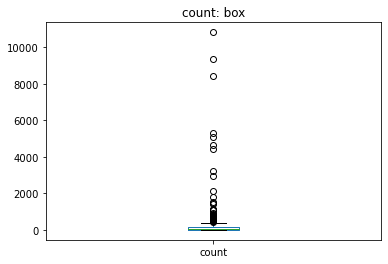

In [69]:
print(df_web['count'].describe())
visit = df_web['count']
visit.plot.box()
plt.title(f'count: box')
plt.show()

网站访问量的分布，访问次数最的几个网站为Free Dowlaod、Internet Explore与Microsoft.com Searc

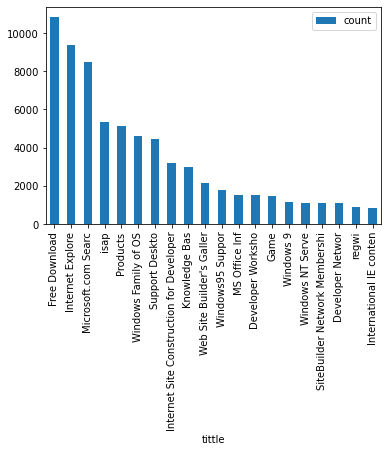

In [70]:
df_web.sort_values(by='count', ascending=False)[['tittle', 'count']].set_index('tittle').head(20).plot.bar()

取数据集

In [72]:
pip install efficient_apriori

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [73]:
from efficient_apriori import apriori
import operator

In [74]:
DataSet = []
for index, row in df_log.iterrows():
    log = row['web_ids']
    log = log.split(' ')
    DataSet.append(log)
DataSet[:10]

[['1000', '1001', '1002'],
 ['1001', '1003'],
 ['1001', '1003', '1004'],
 ['1005'],
 ['1006'],
 ['1003', '1004'],
 ['1007'],
 ['1004'],
 ['1008', '1009'],
 ['1010', '1000', '1011', '1012', '1013', '1014']]

最小支持度设定为0.02，最小置信度为0.5的条件下，频繁项集和强关联规则如下

In [75]:
itemsets, rules = apriori(DataSet, min_support=0.02,  min_confidence=0.5,max_length=10)
for i in itemsets:
    print(f'{i}:')
    for item in itemsets[i]:
        print(f'{item}:{itemsets[i][item]}', end=';    ')
    print('')
    print('')
print('')
for rule in rules:
    print(rule)

1:
('1000',):912;    ('1001',):4451;    ('1002',):749;    ('1003',):2968;    ('1004',):8463;    ('1007',):865;    ('1008',):10836;    ('1009',):4628;    ('1010',):698;    ('1014',):728;    ('1017',):5108;    ('1018',):5330;    ('1020',):1087;    ('1025',):2123;    ('1026',):3220;    ('1030',):1115;    ('1032',):1446;    ('1034',):9383;    ('1035',):1791;    ('1036',):759;    ('1037',):1160;    ('1038',):1110;    ('1040',):1506;    ('1041',):1500;    ('1295',):716;    ('1052',):842;    ('1053',):670;    ('1058',):672;    

2:
('1001', '1003'):1806;    ('1001', '1004'):1589;    ('1001', '1008'):1191;    ('1001', '1009'):841;    ('1001', '1017'):1060;    ('1001', '1018'):1944;    ('1001', '1034'):795;    ('1001', '1035'):968;    ('1003', '1004'):1281;    ('1003', '1008'):1020;    ('1003', '1018'):1534;    ('1003', '1035'):790;    ('1004', '1008'):1977;    ('1004', '1009'):1283;    ('1004', '1017'):1632;    ('1004', '1018'):1465;    ('1004', '1034'):1743;    ('1008', '1009'):2549;    ('100

这些频繁项集涉及到的网页如下

In [76]:
items = itemsets[1].keys()
for item in items:
    web = web_dict[item[0]]
    print(web)

{'tittle': 'regwi', 'url': '/regwi', 'count': 912}
{'tittle': 'Support Deskto', 'url': '/suppor', 'count': 4451}
{'tittle': 'End User Produced Vie', 'url': '/athom', 'count': 749}
{'tittle': 'Knowledge Bas', 'url': '/k', 'count': 2968}
{'tittle': 'Microsoft.com Searc', 'url': '/searc', 'count': 8463}
{'tittle': 'International IE conten', 'url': '/ie_int', 'count': 865}
{'tittle': 'Free Download', 'url': '/msdownloa', 'count': 10836}
{'tittle': 'Windows Family of OS', 'url': '/window', 'count': 4628}
{'tittle': 'Visual Basi', 'url': '/vbasi', 'count': 698}
{'tittle': 'Office Free Stuf', 'url': '/officefreestuf', 'count': 728}
{'tittle': 'Products', 'url': '/product', 'count': 5108}
{'tittle': 'isap', 'url': '/isap', 'count': 5330}
{'tittle': 'Developer Networ', 'url': '/msd', 'count': 1087}
{'tittle': "Web Site Builder's Galler", 'url': '/galler', 'count': 2123}
{'tittle': 'Internet Site Construction for Developer', 'url': '/sitebuilde', 'count': 3220}
{'tittle': 'Windows NT Serve', 'ur

对于这些存在于频繁项集的网站，可以在导航页为其设置超链接